# Modelos y matrices de correlación incorporando ajustes y mejoras del primero 

In [15]:
import pandas as pd
import pymc as pm
import arviz as az
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pytensor  
from patsy import dmatrix


In [16]:
# read data
df = pd.read_csv("../data/clean/clean2_final_nutricion_salud.csv")

---

## Matriz de correlación por pares

Matriz de correlación (Pearson):


,folio,intp,entidad,municipio,localidad,sexo,edad_meses,edad_anios,peso_kg,talla_cm,...,est_marg,pondef,meses,afilia_1ra,afilia_tras,pondei,deciles,pondeh,imc,edad_anios_calc
folio,1.000000,-0.009242,0.999978,0.174819,-0.128522,-0.015708,-0.019829,-0.019829,-0.029718,-0.027768,...,-0.005046,0.025340,-0.003689,0.024656,0.017710,0.039474,-0.054604,0.038366,-0.014646,-0.019829
intp,-0.009242,1.000000,-0.009275,0.011212,-0.006999,-0.005766,-0.231210,-0.231210,-0.231212,-0.240591,...,0.111976,0.088355,0.004729,-0.027052,-0.031814,0.028674,-0.216522,0.024534,-0.091171,-0.231210
entidad,0.999978,-0.009275,1.000000,0.172727,-0.129048,-0.015625,-0.019828,-0.019828,-0.029721,-0.027788,...,-0.005359,0.025245,-0.003740,0.024628,0.017671,0.039369,-0.054593,0.038247,-0.014627,-0.019828
municipio,0.174819,0.011212,0.172727,1.000000,-0.085694,-0.007987,0.002818,0.002818,-0.032923,-0.018502,...,-0.008626,0.188764,-0.000823,0.027905,0.014559,0.211969,-0.086784,0.220322,-0.044279,0.002818
localidad,-0.128522,-0.006999,-0.129048,-0.085694,1.000000,-0.005967,-0.013819,-0.013819,-0.016454,-0.018403,...,0.115799,-0.091637,-0.005839,0.002364,0.005858,-0.105092,-0.022315,-0.103880,-0.004310,-0.013819
sexo,-0.015708,-0.005766,-0.015625,-0.007987,-0.005967,1.000000,0.001066,0.001066,-0.014869,-0.008702,...,-0.001001,-0.009388,0.000908,-0.001435,-0.002125,-0.011660,-0.003326,-0.007123,-0.035657,0.001066
edad_meses,-0.019829,-0.231210,-0.019828,0.002818,-0.013819,0.001066,1.000000,1.000000,0.860196,0.959717,...,-0.187025,-0.061484,0.018828,0.155185,0.136075,-0.056906,-0.084149,-0.044930,0.241831,1.000000
edad_anios,-0.019829,-0.231210,-0.019828,0.002818,-0.013819,0.001066,1.000000,1.000000,0.860196,0.959717,...,-0.187025,-0.061484,0.018828,0.155185,0.136075,-0.056906,-0.084149,-0.044930,0.241831,1.000000
peso_kg,-0.029718,-0.231212,-0.029721,-0.032923,-0.016454,-0.014869,0.860196,0.860196,1.000000,0.897720,...,-0.217731,-0.061133,0.017570,0.128673,0.113112,-0.044078,-0.001571,-0.035789,0.634046,0.860196
talla_cm,-0.027768,-0.240591,-0.027788,-0.018502,-0.018403,-0.008702,0.959717,0.959717,0.897720,1.000000,...,-0.192979,-0.056554,0.019239,0.129401,0.115950,-0.044084,-0.026756,-0.032067,0.256153,0.959717


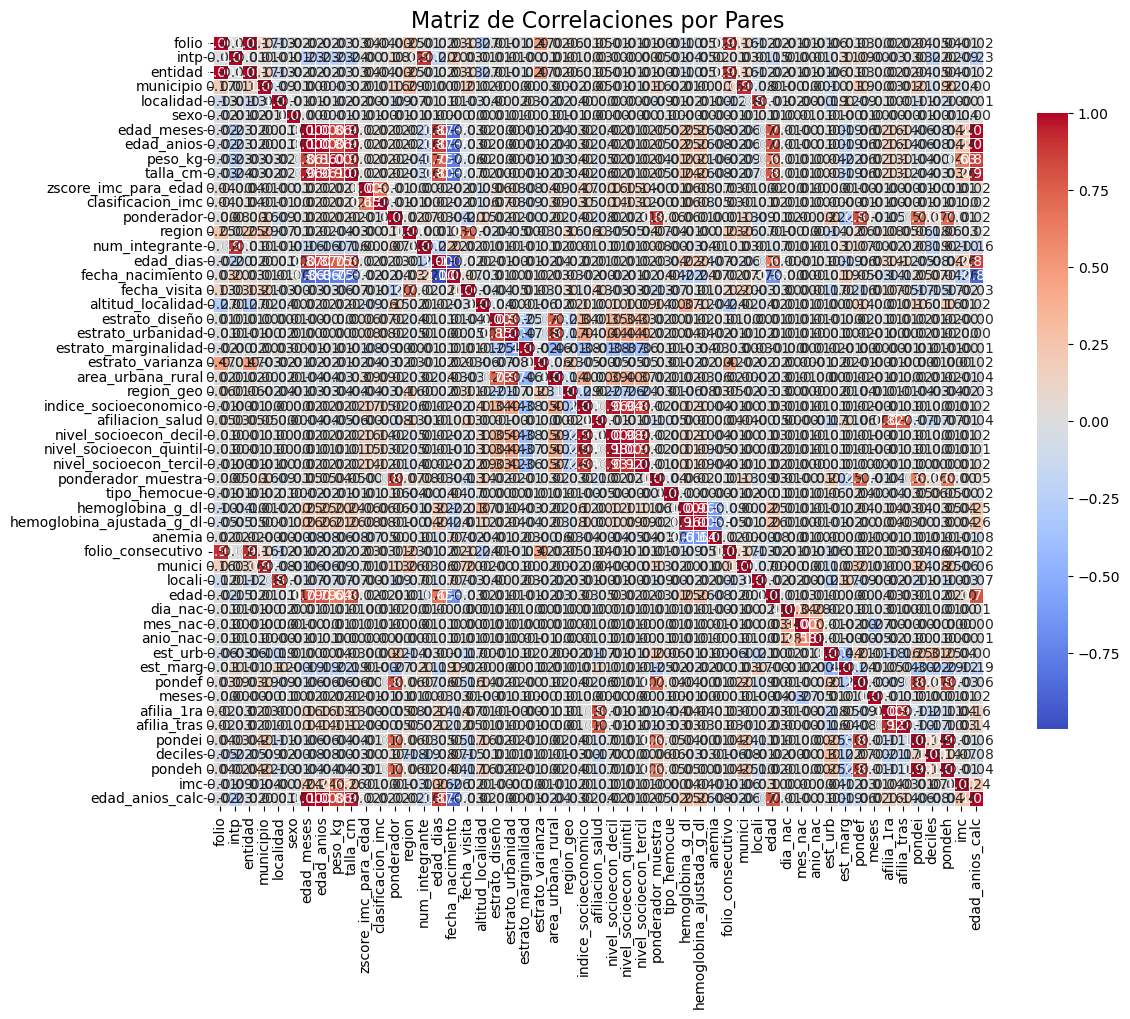

In [17]:
# Matriz de correlación para detectar variables redundantes

# 1️⃣ Filtrar solo columnas numéricas
numeric_df = df.select_dtypes(include=[np.number])

# 2️⃣ Calcular la matriz de correlación
corr_matrix = numeric_df.corr(method='pearson')

# 3️⃣ Mostrar matriz
print("Matriz de correlación (Pearson):")
display(corr_matrix)

# 4️⃣ Graficar Heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True,
            cbar_kws={"shrink": .8}, linewidths=.5)
plt.title("Matriz de Correlaciones por Pares", fontsize=16)
plt.show()


Matriz de correlación (solo |corr| ≥ 0.85):


,folio,intp,entidad,municipio,localidad,sexo,edad_meses,edad_anios,peso_kg,talla_cm,...,est_marg,pondef,meses,afilia_1ra,afilia_tras,pondei,deciles,pondeh,imc,edad_anios_calc
folio,1.000000,NaN,0.999978,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
intp,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
entidad,0.999978,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
municipio,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
localidad,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sexo,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
edad_meses,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,0.860196,0.959717,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
edad_anios,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,0.860196,0.959717,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
peso_kg,NaN,NaN,NaN,NaN,NaN,NaN,0.860196,0.860196,1.000000,0.897720,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.860196
talla_cm,NaN,NaN,NaN,NaN,NaN,NaN,0.959717,0.959717,0.897720,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.959717


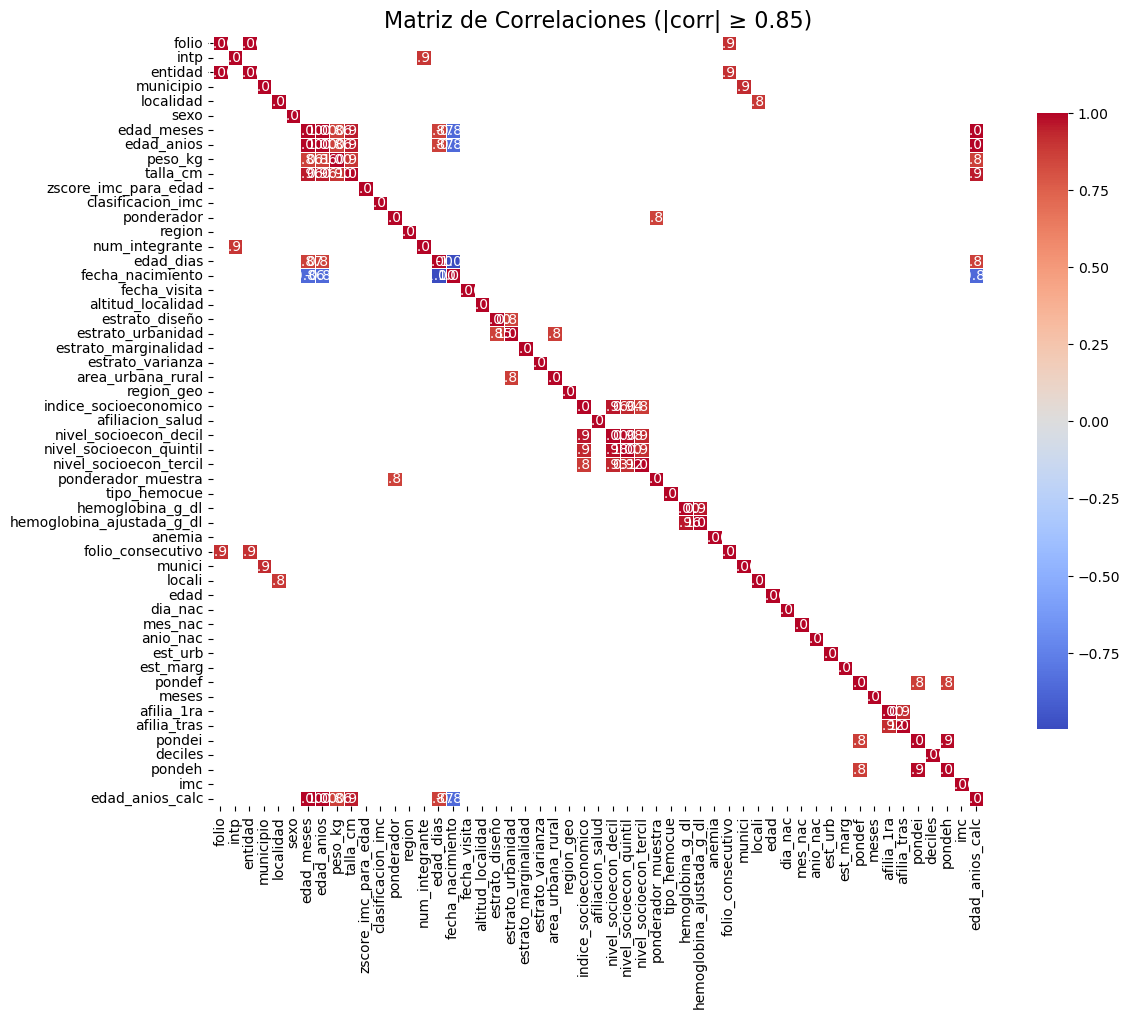

In [18]:
# Umbral de correlación alta
threshold = 0.85

# Crear máscara de correlaciones que cumplen el umbral
mask_high = corr_matrix.abs() >= threshold

# Mantener la diagonal
for i in range(len(mask_high)):
    mask_high.iloc[i, i] = True

# Filtrar la matriz
filtered_corr = corr_matrix.where(mask_high)

# Mostrar tabla filtrada
print("Matriz de correlación (solo |corr| ≥ 0.85):")
display(filtered_corr)

# Heatmap solo con correlaciones altas
plt.figure(figsize=(14, 10))
sns.heatmap(filtered_corr, annot=True, fmt=".2f", cmap="coolwarm", square=True,
            cbar_kws={"shrink": .8}, linewidths=.5)
plt.title(f"Matriz de Correlaciones (|corr| ≥ {threshold})", fontsize=16)
plt.show()


Edad → edad_meses, edad_anios y edad_anios_calc están prácticamente perfectamente correlacionadas, lo que indica que son distintas representaciones de la misma información. Basta con dejar una sola.

IMC y z-score → imc y zscore_imc_para_edad están muy correlacionadas, aunque el z-score está estandarizado por edad y sexo, decidir si nos interesa trabajar con la métrica cruda o la estandarizada.

Hemoglobina → hemoglobina_g_dl y hemoglobina_ajustada_g_dl tienen correlación altísima; probablemente la ajustada sea la versión final.

Índice socioeconómico y sus escalas → indice_socioeconomico, nivel_socioecon_decil, nivel_socioecon_quintil, nivel_socioecon_tercil son derivados unos de otros; basta con uno (o varios para la categorización ¿?).

---

## Pruebas de Modelo

In [19]:
# Filtramos observaciones con datos completos de talla, edad y sexo
df_model = df[["talla_cm", "edad_anios_calc", "sexo", "peso_kg", "municipio", "id_persona"]].dropna()

# Establecemos 'id_persona' como índice del DataFrame
df_model = df_model.set_index("id_persona")

# Codificamos correctamente sexo 
# Recodeamos sexo: 0 = mujer, 1 = hombre
df_model["sexo"] = df_model["sexo"].map({2: 0, 1: 1})

# Confirmamos los tipos de variables y que no haya NAs
df_model.info()
df_model.describe()
df_model["sexo"].value_counts()
df_model["municipio"].nunique()

<class 'pandas.core.frame.DataFrame'>
Index: 25355 entries, 100001_3 to 70336_4
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   talla_cm         25355 non-null  float64
 1   edad_anios_calc  25355 non-null  float64
 2   sexo             25355 non-null  int64  
 3   peso_kg          25355 non-null  float64
 4   municipio        25355 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 1.2+ MB


177

In [20]:
# Codificamos cada municipio con un índice entero único (de 0 a n_grupos - 1)
df_model["municipio_idx"] = pd.Categorical(df_model["municipio"]).codes

# Verificamos que se creó correctamente
df_model[["municipio", "municipio_idx"]].drop_duplicates().sort_values("municipio_idx").head()


,municipio,municipio_idx
id_persona,,
100001_3,1.0,0
11276_3,2.0,1
110044_5,3.0,2
100075_5,4.0,3
100121_6,5.0,4


---

In [21]:
# Centrar la edad y guardar la media: 
# Esto ayuda a que el intercepto sea interpretable (talla promedio en la edad media) y mejora la estabilidad numérica del muestreo.
edad_mean = df_model["edad_anios_calc"].mean()
df_model["edad_c"] = df_model["edad_anios_calc"] - edad_mean

print(f"Edad media en la muestra: {edad_mean:.3f} años")
df_model[["edad_anios_calc", "edad_c"]].head()


Edad media en la muestra: 6.266 años


,edad_anios_calc,edad_c
id_persona,,
100001_3,8.695414,2.429254
100006_6,11.211499,4.945339
100008_10,7.561944,1.295784
100009_3,6.277892,0.011732
100010_7,8.145106,1.878946


---

## Primer modelo: modelo base + interacción no lineal edad y sexo + intercepto aleatorio por municipio

In [29]:
# Variables base
y         = df_model["talla_cm"].to_numpy()                    # objetivo (cm)
sexo      = df_model["sexo"].to_numpy().astype(int)            # 0=mujer, 1=hombre
muni_idx  = df_model["municipio_idx"].to_numpy().astype(int)   # 0..n_municipios-1

# Edad centrada (mejora estabilidad y hace interpretable el intercepto)
if "edad_c" in df_model.columns:
    edad_c = df_model["edad_c"].to_numpy()
else:
    edad_c = (df_model["edad_anios_calc"] - df_model["edad_anios_calc"].mean()).to_numpy()

# Tamaños
n_municipios = int(df_model["municipio_idx"].nunique())

print(f"n_obs={y.shape[0]} | n_municipios={n_municipios} | edad_c mean={edad_c.mean():.3f}")


n_obs=25355 | n_municipios=177 | edad_c mean=-0.000


In [30]:
with pm.Model() as modelo_simple:
    # 1) PRIORS GLOBALES (en cm)
    beta_0        = pm.Normal("beta_0", mu=125, sigma=10)   # intercepto general (edad centrada=0, sexo=0)
    beta_edad     = pm.Normal("beta_edad", mu=5,   sigma=2) # efecto lineal de la edad
    beta_sexo     = pm.Normal("beta_sexo", mu=3,   sigma=2) # efecto del sexo (hombre vs mujer) a edad media
    beta_edad_sex = pm.Normal("beta_edad_sex", mu=0, sigma=2)  # interacción edad×sexo

    # 2) NIVEL 2: EFECTO ALEATORIO POR MUNICIPIO (NO-CENTRADO)
    sigma_grupo = pm.HalfNormal("sigma_grupo", sigma=5)               # sd entre municipios
    z_alpha_j   = pm.Normal("z_alpha_j", mu=0, sigma=1, shape=n_municipios)  # estándar
    alpha_j     = pm.Deterministic("alpha_j", sigma_grupo * z_alpha_j)       # no centrado

    # 3) DESVIACIÓN RESIDUAL
    sigma_obs = pm.HalfNormal("sigma_obs", sigma=5)

    # 4) MEDIA ESPERADA con interacción edad×sexo
    mu = (
        beta_0
        + beta_edad * edad_c
        + beta_sexo * sexo
        + beta_edad_sex * (edad_c * sexo)
        + alpha_j[muni_idx]
    )

    # 5) LIKELIHOOD
    talla_obs = pm.Normal("talla_obs", mu=mu, sigma=sigma_obs, observed=y)

    # 6) INFERENCIA
    trace = pm.sample(
        draws=1200, tune=1200,
        chains=4, cores=1,
        target_accept=0.97,
        init="jitter+adapt_diag",
        random_seed=42,
        return_inferencedata=True
    )


Initializing NUTS using jitter+adapt_diag...
Sequential sampling (4 chains in 1 job)
NUTS: [beta_0, beta_edad, beta_sexo, beta_edad_sex, sigma_grupo, z_alpha_j, sigma_obs]


/opt/anaconda3/envs/pymc_env/lib/python3.10/site-packages/rich/live.py:256: UserWarning: install "ipywidgets" for 
Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 1_200 tune and 1_200 draw iterations (4_800 + 4_800 draws total) took 190 seconds.


In [31]:
az.summary(trace, var_names=["beta_0","beta_edad","beta_sexo","beta_edad_sex",
                                   "sigma_grupo","sigma_obs"], round_to=2)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
beta_0,111.25,0.14,110.98,111.50,0.0,0.0,840.99,1787.48,1.01
beta_edad,6.61,0.02,6.58,6.64,0.0,0.0,5898.73,3803.90,1.00
beta_sexo,0.44,0.08,0.30,0.59,0.0,0.0,10175.39,3423.09,1.00
beta_edad_sex,-0.23,0.02,-0.27,-0.18,0.0,0.0,5796.42,3488.35,1.00
sigma_grupo,1.49,0.12,1.28,1.71,0.0,0.0,1246.45,2353.10,1.00
sigma_obs,6.09,0.03,6.04,6.14,0.0,0.0,9222.30,2834.14,1.00


#### Resultados del modelo lineal jerárquico con interacción Edad × Sexo  

Se ajustó un modelo jerárquico bayesiano donde la talla infantil es la variable dependiente. 
Los predictores fueron edad, sexo, la interacción entre ambos y un efecto aleatorio por municipio para capturar diferencias territoriales.  

Los resultados muestran lo siguiente:  

- El intercepto indica la talla promedio inicial en niñas, que es alrededor de 111 cm en la edad de referencia.  
- El coeficiente de edad es de aproximadamente 6.6 cm por año, lo que refleja el crecimiento lineal esperado en niñas.  
- El coeficiente de sexo es positivo (0.44 cm), lo que significa que los niños comienzan en promedio un poco más altos que las niñas.  
- La interacción edad por sexo es negativa (-0.23). Esto implica que los niños, aunque parten ligeramente más altos, crecen un poco más despacio que las niñas, aproximadamente 0.2 cm menos por año.  
- La variabilidad entre municipios existe, pero es moderada (desviación de ~1.5 cm).  
- El error residual del modelo es de alrededor de 6 cm, reflejando la dispersión individual que no explican las covariables.  

Biológicamente este patrón tiene sentido. Durante los primeros años, los niños suelen ser marginalmente más altos que las niñas. Sin embargo, hacia la preadolescencia, las niñas tienden a crecer más rápido debido a un inicio más temprano de la maduración puberal. Esto hace que, alrededor de los 8 a 10 años, las niñas alcancen y superen a los niños en estatura, lo cual se refleja en la pendiente más pronunciada para ellas.  

En síntesis, el modelo reproduce un fenómeno conocido: una ventaja inicial de los niños en talla que se revierte progresivamente porque las niñas comienzan antes el estirón puberal. El signo negativo de la interacción edad por sexo es consistente con la teoría biológica y da confianza en que el modelo está capturando dinámicas reales del crecimiento infantil.  

---

## Segundo modelo: primer modelo + cada municipio tendrá intercepto y pendiente de edad aleatorios (diferencia en velocidad de crecimiento con la edad)

In [32]:
with pm.Model() as modelo_step2:
    # 1) PRIORS GLOBALES (igual que antes)
    beta_0        = pm.Normal("beta_0", mu=125, sigma=10)
    beta_edad     = pm.Normal("beta_edad", mu=5,   sigma=2)
    beta_sexo     = pm.Normal("beta_sexo", mu=3,   sigma=2)
    beta_edad_sex = pm.Normal("beta_edad_sex", mu=0, sigma=2)

    # 2) NIVEL 2: EFECTOS ALEATORIOS POR MUNICIPIO (NO-CENTRADOS)
    #    a0_j: intercepto aleatorio; a1_j: pendiente aleatoria sobre edad_c
    sd_a0 = pm.HalfNormal("sd_a0", sigma=5)      # dispersión entre municipios en el nivel
    sd_a1 = pm.HalfNormal("sd_a1", sigma=2)      # dispersión entre municipios en la pendiente (edad)

    z_a0 = pm.Normal("z_a0", mu=0, sigma=1, shape=n_municipios) # intercepto aleatorio no-centrado (Normal estándar)
    z_a1 = pm.Normal("z_a1", mu=0, sigma=1, shape=n_municipios) # pendiente aleatoria no-centrada (Normal estándar)

    a0 = pm.Deterministic("a0", sd_a0 * z_a0)    # intercepto aleatorio no-centrado
    a1 = pm.Deterministic("a1", sd_a1 * z_a1)    # pendiente aleatoria no-centrada

    # 3) DESVIACIÓN RESIDUAL (igual)
    sigma_obs = pm.HalfNormal("sigma_obs", sigma=5)

    # 4) MEDIA ESPERADA (añadimos a1[muni_idx] * edad_c)
    mu = (
        beta_0
        + beta_edad * edad_c
        + beta_sexo * sexo
        + beta_edad_sex * (edad_c * sexo)
        + a0[muni_idx]                        # intercepto aleatorio por municipio
        + a1[muni_idx] * edad_c               # NUEVO: pendiente aleatoria por municipio
    )

    # 5) LIKELIHOOD (igual: Normal)
    talla_obs = pm.Normal("talla_obs", mu=mu, sigma=sigma_obs, observed=y)

    # 6) INFERENCIA (parámetros de muestreo algo prudentes)
    trace_step2 = pm.sample(
        draws=1200, tune=1200,
        chains=4, cores=1,
        target_accept=0.97,
        init="jitter+adapt_diag",
        random_seed=42,
        return_inferencedata=True
    )


Initializing NUTS using jitter+adapt_diag...
Sequential sampling (4 chains in 1 job)
NUTS: [beta_0, beta_edad, beta_sexo, beta_edad_sex, sd_a0, sd_a1, z_a0, z_a1, sigma_obs]


/opt/anaconda3/envs/pymc_env/lib/python3.10/site-packages/rich/live.py:256: UserWarning: install "ipywidgets" for 
Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 1_200 tune and 1_200 draw iterations (4_800 + 4_800 draws total) took 509 seconds.


In [33]:
az.summary(
    trace_step2, 
    var_names=["beta_0","beta_edad","beta_sexo","beta_edad_sex","sd_a0","sd_a1","sigma_obs"],
    round_to=2
)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
beta_0,111.26,0.13,111.01,111.51,0.0,0.0,713.39,1512.65,1.01
beta_edad,6.57,0.02,6.52,6.61,0.0,0.0,2341.18,3171.23,1.00
beta_sexo,0.43,0.08,0.28,0.57,0.0,0.0,9279.53,3603.70,1.00
beta_edad_sex,-0.23,0.02,-0.27,-0.18,0.0,0.0,6093.38,3919.17,1.00
sd_a0,1.47,0.12,1.25,1.69,0.0,0.0,1029.65,2269.27,1.00
sd_a1,0.15,0.03,0.10,0.20,0.0,0.0,1262.50,2282.59,1.00
sigma_obs,6.08,0.03,6.03,6.13,0.0,0.0,8836.17,3333.84,1.00


---

## Explicaciones del modelo jerárquico bayesiano con splines y mejoras

### 1) Uso de splines para la edad
Una recta simple asume que la relación entre edad y talla es constante en todo el rango de edades. En el crecimiento infantil, especialmente entre los 8 y 18 años, esto no es cierto debido al “growth spurt” o estirón puberal, donde la velocidad de crecimiento cambia rápidamente.  
Los splines, en particular los B-splines cúbicos, dividen la edad en tramos conectados suavemente. Esto permite que la curva se adapte a aceleraciones y desaceleraciones en el crecimiento sin imponer una forma rígida. Además, controlando el número de tramos, se evita sobreajuste y se mantiene la suavidad.

---

### 2) Pendiente aleatoria de edad por municipio
Si solo incluimos interceptos aleatorios, cada municipio tendrá un nivel medio distinto de talla, pero se asumirá la misma relación con la edad.  
Permitir pendientes aleatorias significa que la velocidad de crecimiento puede variar entre municipios. Esto refleja diferencias geográficas y contextuales, haciendo el modelo más realista y flexible.

---

### 3) Student-t en vez de Normal
La distribución Normal, usada como verosimilitud, es sensible a valores atípicos. En datos reales de talla pueden existir mediciones erróneas o casos extremos.  
La distribución Student-t tiene colas más pesadas, lo que reduce el impacto de los outliers. Si los datos no presentan valores extremos, el modelo ajustará automáticamente los grados de libertad y se parecerá a la Normal.

---

### 4) Centrados de variables
Centrar la edad significa restarle su media para que el cero de la variable corresponda a la edad promedio de la muestra. Esto facilita la interpretación del intercepto como la talla media a la edad media y mejora la eficiencia del muestreo MCMC.  
Podemos centrar otras variables si fuera necesario, pero en este caso mantener el sexo como binario 0/1 hace que la interpretación de su coeficiente sea más directa.

---

### 5) Interacción entre edad y sexo
Aunque los splines capturan la forma general del crecimiento, niños y niñas no siguen el mismo patrón: el estirón suele ocurrir antes en las niñas y durar más en los niños.  
Agregar un término de interacción entre edad y sexo permite que el modelo capture diferencias globales en la pendiente de crecimiento entre ambos sexos, manteniendo la parte curva compartida.

---

### 6) Evaluación con prior predictive y posterior predictive
El prior predictive consiste en simular datos solo con las distribuciones a priori, sin usar datos reales, para verificar que las suposiciones iniciales producen valores plausibles.  
El posterior predictive simula datos a partir de los parámetros ajustados, para evaluar si el modelo reproduce bien los patrones observados. Estas comprobaciones son fundamentales para validar que el modelo es coherente y útil.

---

### 7) (Opcional) LOO/WAIC para comparar variantes
Cuando se tengan diferentes versiones del modelo (por ejemplo, con y sin interacción, con más o menos nodos spline), se puede usar LOO (Leave-One-Out cross-validation) o WAIC (Widely Applicable Information Criterion) para comparar su ajuste y capacidad predictiva.  
Estos criterios penalizan la complejidad innecesaria y ayudan a elegir el modelo más parsimonioso que mantenga buen rendimiento.

---

### 8) Comparación con curvas CDC
Se pueden calcular percentiles como el P50 (mediana) y otros por sexo y edad, y compararlos con las curvas de referencia del CDC para identificar sesgos sistemáticos (por ejemplo, diferencias en el nivel o en la forma de la curva).

---

### 9) Proxy para estadio puberal de Tanner ML, Modelos Latentes Probabilísticos u otro (TBD)


---

## Splines

In [25]:
# Construir matriz de B-splines para capturar no linealidad
# Esto permite que el modelo represente la curva de crecimiento sin imponer una relación estrictamente lineal.

# Definimos grados de libertad para las bases spline (ajustar si la curva sale demasiado ondulada o rígida)
df_spline = 5  # Probar despues con 6 o 7 

X_spline = dmatrix(
    "bs(edad, df=df_spline, degree=3, include_intercept=False) - 1",
    {"edad": df_model["edad_anios_calc"]},
    return_type="dataframe"
)
X_s = X_spline.to_numpy()
n_s = X_s.shape[1]

print("Dimensión de la matriz spline:", X_s.shape)
X_spline.head()


Dimensión de la matriz spline: (25355, 5)


,"bs(edad, df=df_spline, degree=3, include_intercept=False)[0]","bs(edad, df=df_spline, degree=3, include_intercept=False)[1]","bs(edad, df=df_spline, degree=3, include_intercept=False)[2]","bs(edad, df=df_spline, degree=3, include_intercept=False)[3]","bs(edad, df=df_spline, degree=3, include_intercept=False)[4]"
id_persona,,,,,
100001_3,0.000000e+00,0.105603,0.539432,0.352512,0.002453
100006_6,0.000000e+00,0.001423,0.056539,0.441249,0.500789
100008_10,9.829018e-04,0.252899,0.606809,0.139309,0.000000
100009_3,2.858507e-02,0.459725,0.484245,0.027445,0.000000
100010_7,1.870746e-07,0.167692,0.597611,0.234697,0.000000


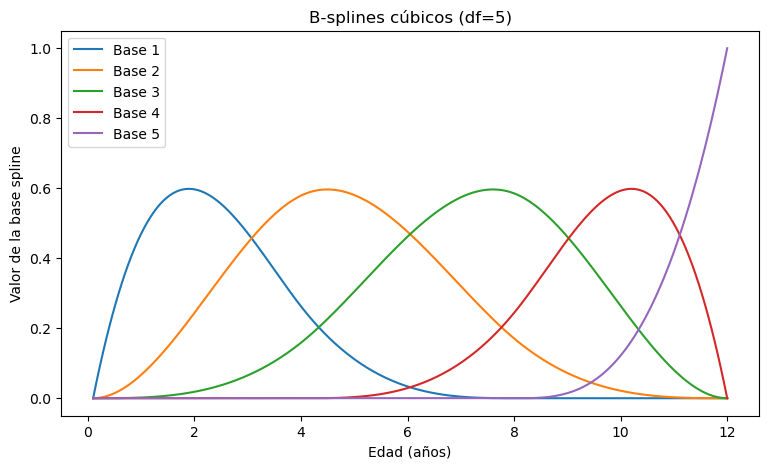

In [26]:
# Creamos un grid de edades para graficar las funciones base
edad_grid = np.linspace(df_model["edad_anios_calc"].min(),
                        df_model["edad_anios_calc"].max(),
                        200)

X_spline_grid = dmatrix(
    f"bs(edad, df={df_spline}, degree=3, include_intercept=False) - 1",
    {"edad": edad_grid},
    return_type="dataframe"
)

# Graficamos cada base
plt.figure(figsize=(9,5))
for i in range(X_spline_grid.shape[1]):
    plt.plot(edad_grid, X_spline_grid.iloc[:, i], label=f"Base {i+1}")

plt.title(f"B-splines cúbicos (df={df_spline})")
plt.xlabel("Edad (años)")
plt.ylabel("Valor de la base spline")
plt.legend()
plt.show()


---

## Sandbox

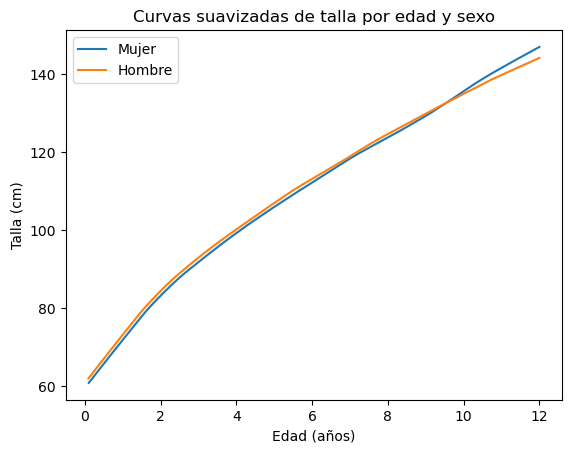

In [27]:
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

x = df_model["edad_anios_calc"].to_numpy()
y = df_model["talla_cm"].to_numpy()
s = df_model["sexo"].to_numpy()

for sex_val, label in [(0,"Mujer"), (1,"Hombre")]:
    mask = (s==sex_val)
    low = sm.nonparametric.lowess(y[mask], x[mask], frac=0.2, return_sorted=True)
    plt.plot(low[:,0], low[:,1], label=label)

plt.xlabel("Edad (años)"); plt.ylabel("Talla (cm)")
plt.title("Curvas suavizadas de talla por edad y sexo")
plt.legend(); plt.show()


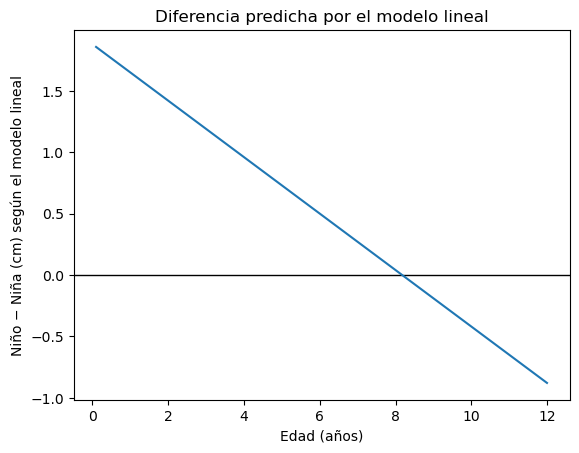

In [28]:
beta_sexo = 0.44
beta_edad_sex = -0.23
edad_mean = df_model["edad_anios_calc"].mean()

edad_grid = np.linspace(x.min(), x.max(), 200)
delta = beta_sexo + beta_edad_sex*(edad_grid - edad_mean)

plt.axhline(0, color="k", lw=1)
plt.plot(edad_grid, delta)
plt.xlabel("Edad (años)")
plt.ylabel("Niño − Niña (cm) según el modelo lineal")
plt.title("Diferencia predicha por el modelo lineal")
plt.show()
